# RECOMIENDAME UN LIBRO
(**Base de datos de libros en inglés de goodreads**)
___
___

##  1 Carga de librerias y accesos.

[//]: <$\sum_{n=1}^{10}n>
___

In [1]:
# Usa "%pip install <library_name>" para instalar una libreria.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Acceso
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/1_Datasets'
%ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/1_Datasets
1.1_input_dataset.csv   1.3_clean_dataset.csv    1.5_encoding_dataset.csv
1.2_sample_dataset.csv  1.4_cluster_dataset.csv  1.6_pca_cluster_dataset.csv


In [3]:
df = pd.read_csv('1.1_input_dataset.csv', index_col=0)

___
___

## 2 Selección de datos
___

### 2.1 Vista preliminar

In [4]:
df.head(3)

,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
Id,,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458


In [5]:
df['Language'].value_counts().head(15)

eng      15988
en-US     2456
spa        637
en-GB      425
fre        331
ger        209
jpn         54
ita         36
mul         29
por         24
zho         17
grc         12
en-CA       11
kor         10
rus          7
Name: Language, dtype: int64

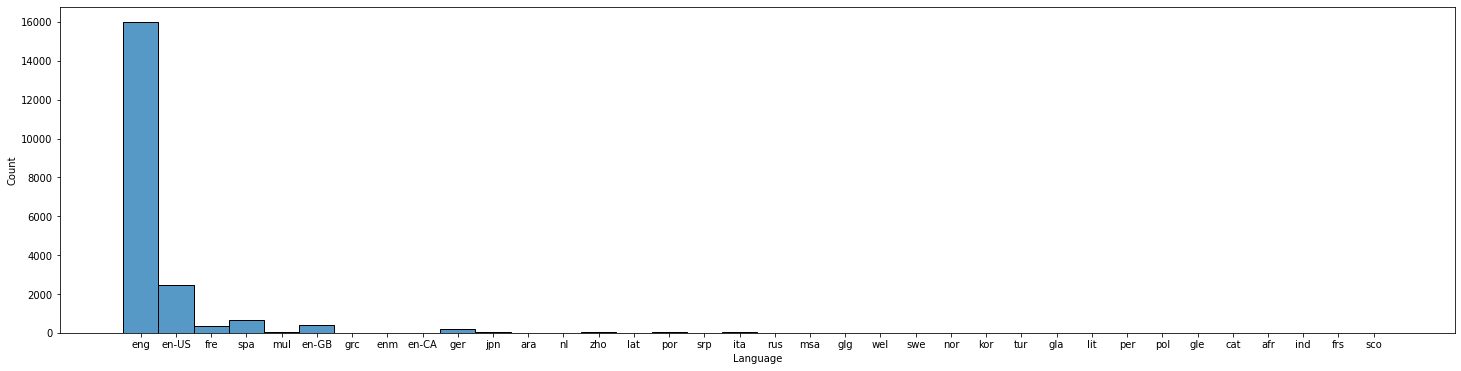

In [6]:
plt.figure(1, figsize = (25,6))
sns.histplot(data = df['Language'])

In [7]:
 mask = ((df['Language'] == 'eng') | (df['Language'] == 'en-US') | (df['Language'] == 'en-Gb') | (df['Language'] == 'en-CA'))
 df = df[mask]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18455 entries, 1 to 99986
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             18455 non-null  object 
 1   RatingDist1      18455 non-null  object 
 2   pagesNumber      18455 non-null  int64  
 3   RatingDist4      18455 non-null  object 
 4   RatingDistTotal  18455 non-null  object 
 5   PublishMonth     18455 non-null  int64  
 6   PublishDay       18455 non-null  int64  
 7   Publisher        18302 non-null  object 
 8   CountsOfReview   18455 non-null  int64  
 9   PublishYear      18455 non-null  int64  
 10  Language         18455 non-null  object 
 11  Authors          18455 non-null  object 
 12  Rating           18455 non-null  float64
 13  RatingDist2      18455 non-null  object 
 14  RatingDist5      18455 non-null  object 
 15  ISBN             18174 non-null  object 
 16  RatingDist3      18455 non-null  object 
dtypes: float64(1

>**Revisión preliminar**.
 
Del data set orignal se elegieron 18 mil como objeto de estudio (títulos en inglés).
 
De las 17 columnas:
* 7 pertenecen al rating, no se conservará el detalle.
* 3 corresponden a la fecha de publicación, solo se conservará el año.

___
___

### 2.2 Selección de columnas

In [9]:
df = df[['ISBN', 'Name', 'Authors', 'Publisher', 'Rating', 'pagesNumber', 'CountsOfReview', 'PublishYear']]

In [10]:
df.sample(3)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
Id,,,,,,,,
39910,1580082688,The Bread Baker's Apprentice: Mastering the Ar...,Peter Reinhart,Ten Speed Press,4.28,320,250,2001
68046,0804460639,Ursula K. Le Guin,Barbara J. Bucknall,Frederick Ungar Publishing Company (NY),3.43,190,0,1981
59814,0553272837,"Brazen Virtue (D.C. Detectives, #2)",Nora Roberts,Bantam,3.83,279,201,1988


> **Reusltado del muestreo.**

El dataset se redujo a 8 variables con 18 mil registros. 

In [11]:
df = df.reset_index(drop=True)
df.to_csv('1.2_sample_dataset.csv')

___
___